In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# 準備和整理數據

In [75]:
from sklearn.datasets import load_boston

In [76]:
boston_datasets = load_boston()

In [77]:
print(boston_datasets.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [78]:
boston = pd.DataFrame(boston_datasets.data, columns = boston_datasets.feature_names)
boston['MEDV'] = boston_datasets.target

In [79]:
correlation_martrix = boston.corr().round(2)

In [80]:
correlation_martrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


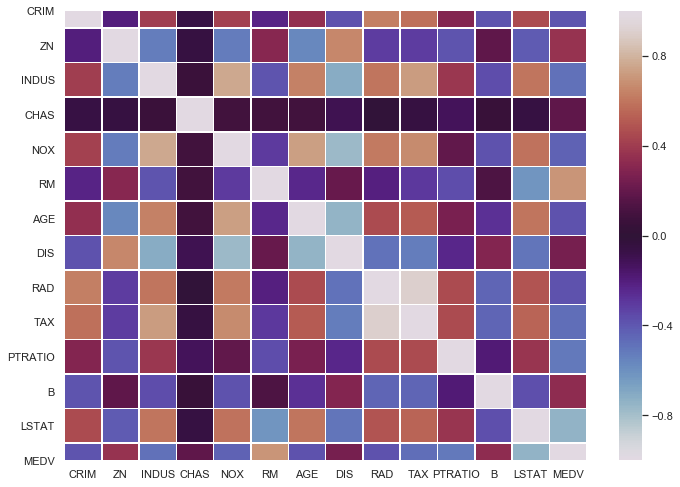

In [81]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.set_style('white')
sns.heatmap(correlation_martrix, cmap = 'twilight', linewidths = 0.5, center = 0, vmin = -1, vmax = 1)

## 去掉相關係數在0.3與-0.3間的數據

In [82]:
condition = np.logical_and(correlation_martrix['MEDV'] <= 0.3 , correlation_martrix['MEDV'] >= -0.3)
correlation_martrix[condition]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,-0.06,-0.04,0.06,1.0,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1.0,-0.49,-0.53,-0.23,0.29,-0.50,0.25


In [83]:
boston.drop(['CHAS', 'DIS'], axis = 1, inplace = True)

In [100]:
boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33,36.2


# 迴歸機

In [85]:
from sklearn.model_selection  import train_test_split

In [86]:
X = boston.loc[:,"CRIM":"LSTAT"].values
Y = boston.MEDV

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [88]:
from sklearn.linear_model  import LinearRegression

In [98]:
model = LinearRegression(normalize = True)   # Normalize

In [92]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [93]:
y_predict = model.predict(x_test)

In [94]:
sns.set()

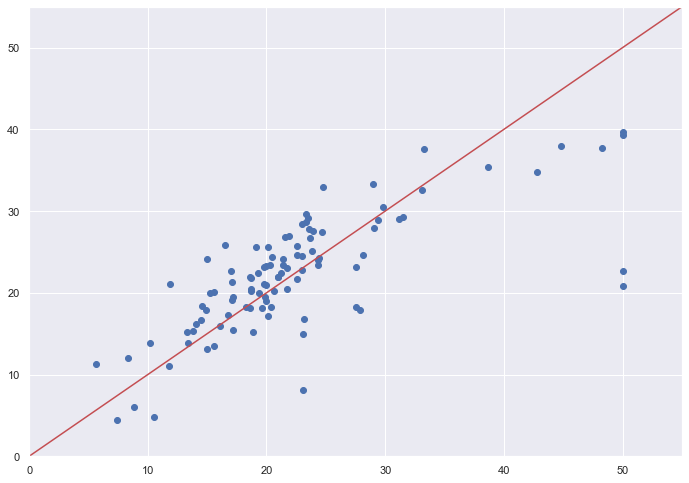

In [95]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0, 55], [0, 55], 'r')

# 不確定還能怎麼表示

In [103]:
print('相對誤差: {:.5%}'.format(((y_predict - y_test)/(y_test)).mean()))

相對誤差: 3.50271%
